In [8]:
import pandas as pd
import numpy as np
import re
import string

import nltk
from nltk.corpus import stopwords, movie_reviews
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('movie_reviews')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\poorv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\poorv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\poorv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\poorv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\poorv\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [10]:
reviews = []
labels = []
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        reviews.append(movie_reviews.raw(fileid))
        labels.append(category)

df = pd.DataFrame({"text": reviews, "label": labels})
print("\nDataset size:", df.shape)
print(df['label'].value_counts())


Dataset size: (2000, 2)
label
neg    1000
pos    1000
Name: count, dtype: int64


In [11]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()                                   
    text = re.sub(r"http\S+", "", text)                 
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)        
    text = re.sub(r"#[A-Za-z0-9_]+", "", text)        
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text) 
    try:
        tokens = nltk.word_tokenize(text)               
    except LookupError:
        nltk.download('punkt')
        nltk.download('punkt_tab')
        tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess)
print("\nPreprocessing complete.")



Preprocessing complete.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.25, random_state=42)

In [13]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



Naive Bayes Results:
Accuracy: 0.808
Classification Report:
               precision    recall  f1-score   support

         neg       0.80      0.84      0.82       257
         pos       0.82      0.78      0.80       243

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



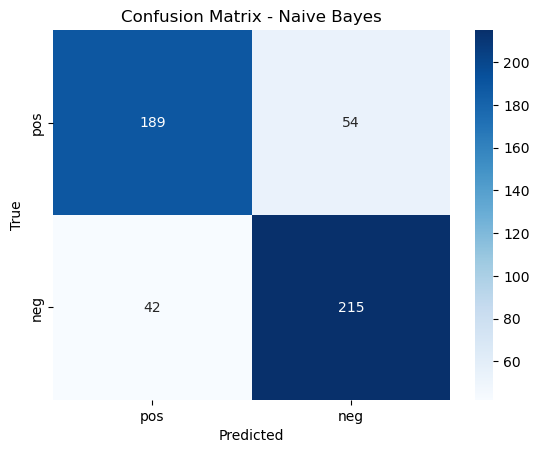


Logistic Regression Results:
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

         neg       0.85      0.82      0.83       257
         pos       0.81      0.84      0.83       243

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



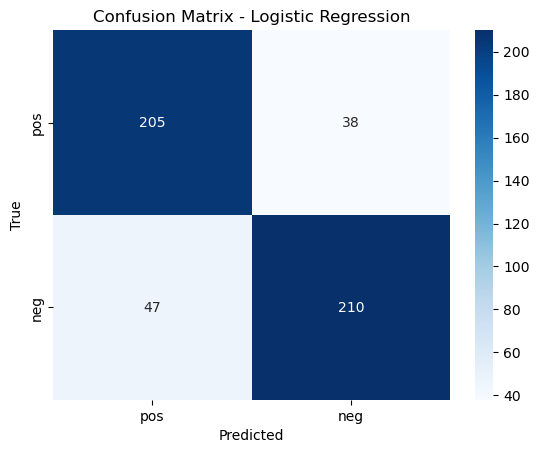


Linear SVM Results:
Accuracy: 0.824
Classification Report:
               precision    recall  f1-score   support

         neg       0.84      0.81      0.83       257
         pos       0.81      0.84      0.82       243

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



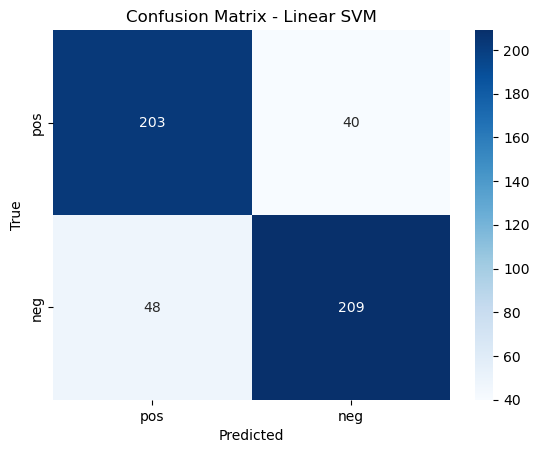

In [14]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Linear SVM": LinearSVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=["pos", "neg"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["pos", "neg"], yticklabels=["pos", "neg"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    results[name] = accuracy_score(y_test, y_pred)

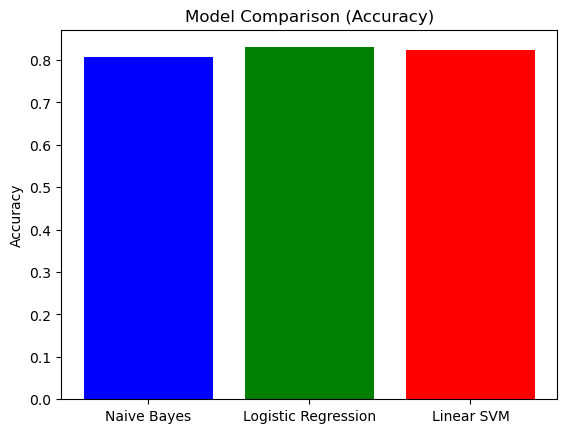

In [15]:
plt.bar(results.keys(), results.values(), color=['blue','green','red'])
plt.title("Model Comparison (Accuracy)")
plt.ylabel("Accuracy")
plt.show()
